[View in Colaboratory](https://colab.research.google.com/github/raduenuca/aiqhack-practice/blob/master/AIQ_Hack.ipynb)

#Loading the MNIST dataset in Keras

## Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

Using TensorFlow backend.


### Fix random seed for reproducibility

In [0]:
seed = 666
np.random.seed(seed)

## Load (downloaded if needed) the MNIST dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Plot ad hoc mnist instances

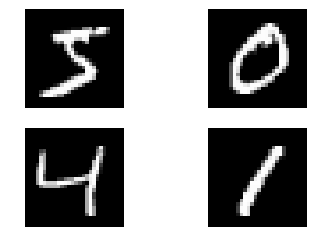

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.axis('off')
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.axis('off')
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.axis('off')
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.axis('off')
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

# Simple Convolutional Neural Network for MNIST

## Import dependencies

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint

from keras.utils import np_utils

## Prepare the dataset

### Reshape to be [samples][pixels][width][height]

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

### Normalize inputs from 0-255 to 0-1

In [0]:
X_train /= 255
X_test /= 255

### One hot encode outputs

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = 10

## The model

### Create the model

In [0]:
model = Sequential()
model.add(Convolution2D(32, (5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

### Compile the model

In [0]:
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])	

### Create checkpoint

In [0]:
filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

### Fit (train) the model

In [16]:
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          epochs=20, 
          batch_size=200, 
          callbacks = [checkpoint],
          verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.2559 - acc: 0.9262 - val_loss: 0.0810 - val_acc: 0.9760

Epoch 00001: val_acc improved from -inf to 0.97600, saving model to weights_best.hdf5
Epoch 2/20
 - 3s - loss: 0.0751 - acc: 0.9775 - val_loss: 0.0473 - val_acc: 0.9850

Epoch 00002: val_acc improved from 0.97600 to 0.98500, saving model to weights_best.hdf5
Epoch 3/20
 - 3s - loss: 0.0523 - acc: 0.9847 - val_loss: 0.0448 - val_acc: 0.9862

Epoch 00003: val_acc improved from 0.98500 to 0.98620, saving model to weights_best.hdf5
Epoch 4/20
 - 3s - loss: 0.0417 - acc: 0.9870 - val_loss: 0.0401 - val_acc: 0.9868

Epoch 00004: val_acc improved from 0.98620 to 0.98680, saving model to weights_best.hdf5
Epoch 5/20
 - 3s - loss: 0.0333 - acc: 0.9896 - val_loss: 0.0416 - val_acc: 0.9859

Epoch 00005: val_acc did not improve from 0.98680
Epoch 6/20
 - 3s - loss: 0.0280 - acc: 0.9912 - val_loss: 0.0355 - val_acc: 0.9885

Epoch 00006: val_acc improved from 0.98680 

### Load the best weights

In [0]:
model.load_weights(filepath)

### Final evaluation of the model

In [18]:
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))  

10000/10000 [==============================] - 1s 69us/step
Final loss: 0.034995, final accuracy: 0.990800


# Export to TensorFlowJs

## Install dependencies

In [19]:
!pip install tensorflowjs

## Convert to TensorFlowJs

### Using command line

In [44]:
!tensorflowjs_converter --input_format=keras {filepath} mnist_tfjs_model

Using TensorFlow backend.


### Use Python

In [0]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'mnist_tfjs_model')

## Download the TensorFlowJs model

In [21]:
!zip -r model.zip mnist_tfjs_model

updating: mnist_tfjs_model/ (stored 0%)
updating: mnist_tfjs_model/model.json (deflated 74%)
updating: mnist_tfjs_model/group1-shard1of1 (deflated 7%)


In [0]:
from google.colab import files

files.download('model.zip')